In [6]:
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import metrics
from keras import models
from keras import layers
from keras.utils import to_categorical

預處理

In [7]:
# 加載mnist資料集,包含訓練數據和測試數據
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#train_images(訓練圖片放置60000張28 * 28像素的數字圖片，且訓練標籤(train_labels)有相對應之60000條標籤對應)
print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))
print(train_labels[:5])  


#將圖片攤平成一維向量>>> 28 * 28 => 784
#神經網路訓練時使用浮點運算，因此需要將原始數據類型轉為float32。
#為何要/255?: (歸一化)圖片像素值在0-255範圍內，通過除以255，可以將數值映射到0-1的區間內，這樣做是為了數據標準化，使不同特徵以同標準表示出。
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

#將訓練與測試集進行one-hot，將原本的數字標籤轉換為長度為10的向量，對應位置為1，其餘為0
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#ex:原標籤為2轉換為下列
#[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)




 train_x:(60000, 28, 28), train_y:(60000,), test_x:(10000, 28, 28), test_y:(10000,)
[5 0 4 1 9]


In [8]:
#訓練:驗證 = 8 : 2(圖片)
#驗證集(20%)
x_val = train_images[48000:]
#訓練集(80%)
partial_train_images = train_images[:48000]

#訓練:驗證 = 8 : 2(標籤)
#驗證集標籤(20%)
y_val = train_labels[48000:]
#訓練集標籤(80%)
partial_train_labels = train_labels[:48000]


# history = model.fit(partial_train_images, partial_train_labels, batch_size=512, epochs=1000, validation_data=(x_val, y_val))


model建立

In [9]:
'''
    隱藏層數量(number of hidden layers): 使用單層隱藏層。
    隱藏層神經元數量(number of units): 隱藏層設置了1000個神經元。
    激活函數(activation function): 隱藏層使用ReLU激活函數,輸出層使用softmax激活函數。
    優化器(optimizer): 使用rmsprop優化器。
    批次大小(batch size): 設置為64。
    訓練迭代次數(epochs): 設置為10次迭代。
    損失函數(loss function): 使用categorical_crossentropy多類別交叉熵損失。
    評估指標(metrics): 使用準確率(accuracy)作為評估指標。
'''
    


#創建一個Sequential模型
network = models.Sequential()

#添加第一個Dense全連接層，內有1000個神經元，激活函數使用relu
#輸入shape為784維的向量，對應原資料28 * 28攤平的圖片
#因為這個模型只有一個隱藏層，層數超淺。
network.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))

#添加第二個Dense全連接層，內有10個神經元，激活函數使用softmax
#因為用於對10個數字類別(0~9)的概率進行預測，用softmax特別適合。
#softmax可以輸出壓縮至0-1之間，且所有輸出之和為1，符合機率的定義。
network.add(layers.Dense(10, activation='softmax'))

#優化器使用rmsprop，損失函數使用categorical_crossentropy，評估指標為準確率
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:
#訓練模型
history = network.fit(partial_train_images, partial_train_labels, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8037 - f1_score: 0.8016 - loss: 0.7106 - precision_1: 0.9209 - recall_1: 0.6517 - val_accuracy: 0.9462 - val_f1_score: 0.9456 - val_loss: 0.1951 - val_precision_1: 0.9597 - val_recall_1: 0.9325
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9453 - f1_score: 0.9448 - loss: 0.1888 - precision_1: 0.9599 - recall_1: 0.9354 - val_accuracy: 0.9598 - val_f1_score: 0.9595 - val_loss: 0.1415 - val_precision_1: 0.9701 - val_recall_1: 0.9512
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9654 - f1_score: 0.9651 - loss: 0.1236 - precision_1: 0.9744 - recall_1: 0.9574 - val_accuracy: 0.9670 - val_f1_score: 0.9668 - val_loss: 0.1141 - val_precision_1: 0.9730 - val_recall_1: 0.9597
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9763 - f1_score: 0.9762 - loss: 0.0855 - precision_1: 0.9816 - recall_1: 0.9714 - val_accuracy: 0.9680 - val_f1_score: 0.9678 - val_loss: 0.1070 - val_precisi

In [11]:
# test_loss, test_acc = network.evaluate(test_images, test_labels)
# print('test_acc:', test_acc)

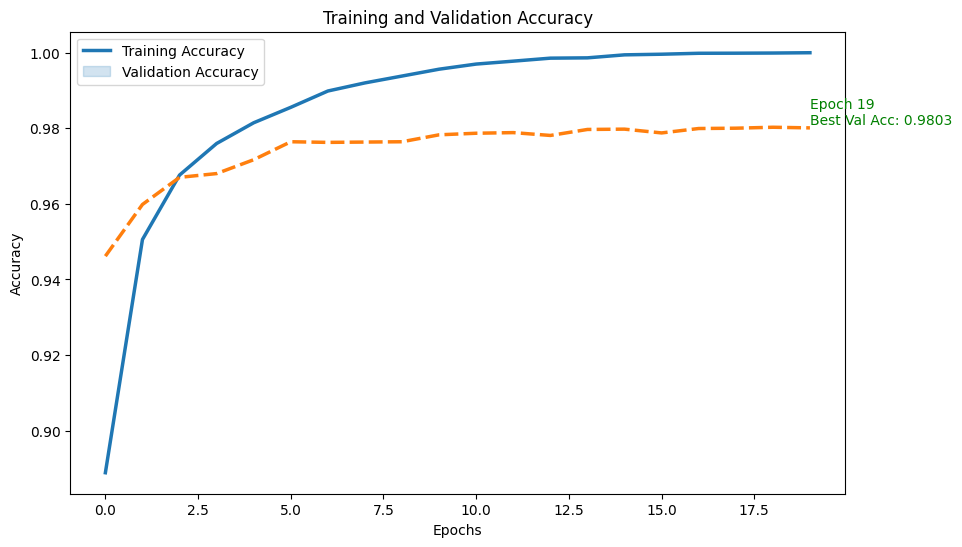

In [12]:
import seaborn as sns
import pandas as pd
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette="tab10", linewidth=2.5)
best_val_accuracy = history_df['val_accuracy'].max()
best_val_epoch = history_df['val_accuracy'].idxmax() + 1
plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training Accuracy', 'Validation Accuracy'])
plt.show()

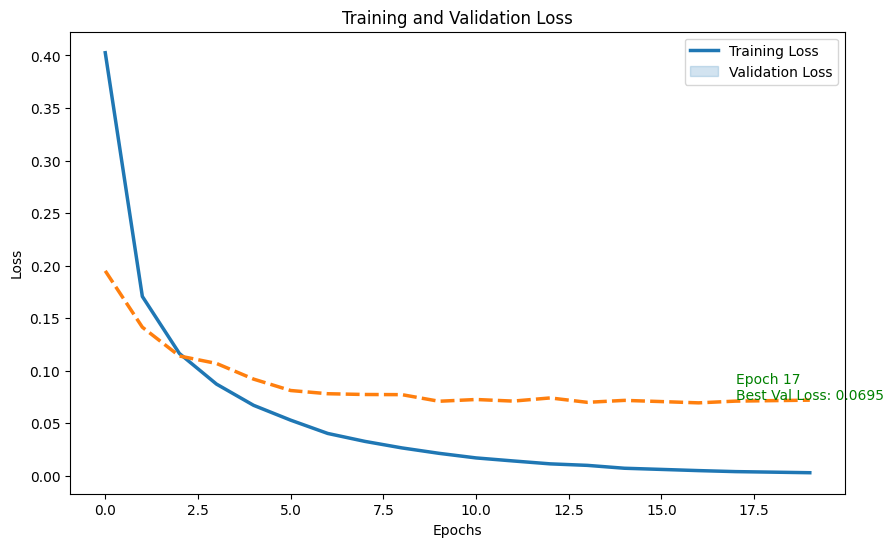

In [13]:
history_df = pd.DataFrame(history.history)
# 使用 Seaborn 繪製曲線
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']], palette="tab10", linewidth=2.5)
best_val_loss = history_df['val_loss'].min()
best_val_epoch = history_df['val_loss'].idxmin() + 1
plt.text(best_val_epoch, best_val_loss, f'Epoch {best_val_epoch}\nBest Val Loss: {best_val_loss:.4f}', 
             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Training Loss', 'Validation Loss'])
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
def create_model(hidden_layers, hidden_units, activation, optimizer, learning_rate=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_shape=(28 * 28,)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate) 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
    return model


def train_model(model, epochs, batch_size, early_stop=None):
    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(patience=early_stop))
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=callbacks)
    return history


不同 Activation function 績效

In [15]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [256, 256, 256, 256]
patient = [20, 20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 - 3s - 15ms/step - accuracy: 0.9100 - f1_score: 0.9091 - loss: 0.3200 - precision_2: 0.9469 - recall_2: 0.8691 - val_accuracy: 0.9566 - val_f1_score: 0.9562 - val_loss: 0.1573 - val_precision_2: 0.9662 - val_recall_2: 0.9471
Epoch 2/100
188/188 - 2s - 8ms/step - accuracy: 0.9623 - f1_score: 0.9620 - loss: 0.1316 - precision_2: 0.9706 - recall_2: 0.9543 - val_accuracy: 0.9685 - val_f1_score: 0.9683 - val_loss: 0.1138 - val_precision_2: 0.9743 - val_recall_2: 0.9626
Epoch 3/100
188/188 - 2s - 8ms/step - accuracy: 0.9760 - f1_score: 0.9758 - loss: 0.0847 - precision_2: 0.9809 - recall_2: 0.9711 - val_accuracy: 0.9697 - val_f1_score: 0.9695 - val_loss: 0.0971 - val_precision_2: 0.9745 - val_recall_2: 0.9652
Epoch 4/100
188/188 - 2s - 8ms/step - accuracy: 0.9836 - f1_score: 0.9835 - loss: 0.0591 - precision_2: 0.9866 - recall_2: 0.9803 - val_accuracy: 0.9743 - val_f1_score: 0.9740 - val_loss: 0.0835 - val_precision_2: 0.9775 - val_recall_2: 0.9717
Epoch 5/100
188/188 - 2s - 8ms/step

第1組參數: 在第 26 EPOCH
最好Accuracy: 0.9824166893959045
LOSS: 0.08009323477745056
第2組參數: 在第 36 EPOCH
最好Accuracy: 0.9815000295639038
LOSS: 0.08192869275808334
第3組參數: 在第 45 EPOCH
最好Accuracy: 0.9794999957084656
LOSS: 0.08374329656362534


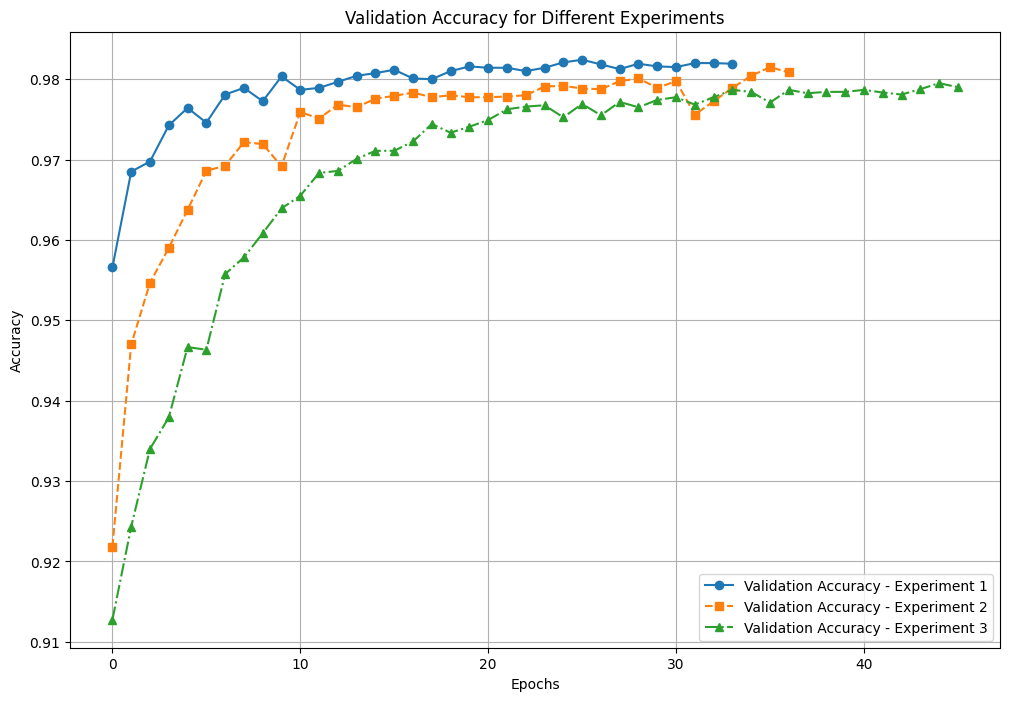

第1組參數: 在第 14 EPOCH
最好LOSS: 0.07212625443935394
第2組參數: 在第 17 EPOCH
最好LOSS: 0.07643868029117584
第3組參數: 在第 26 EPOCH
最好LOSS: 0.07738586515188217


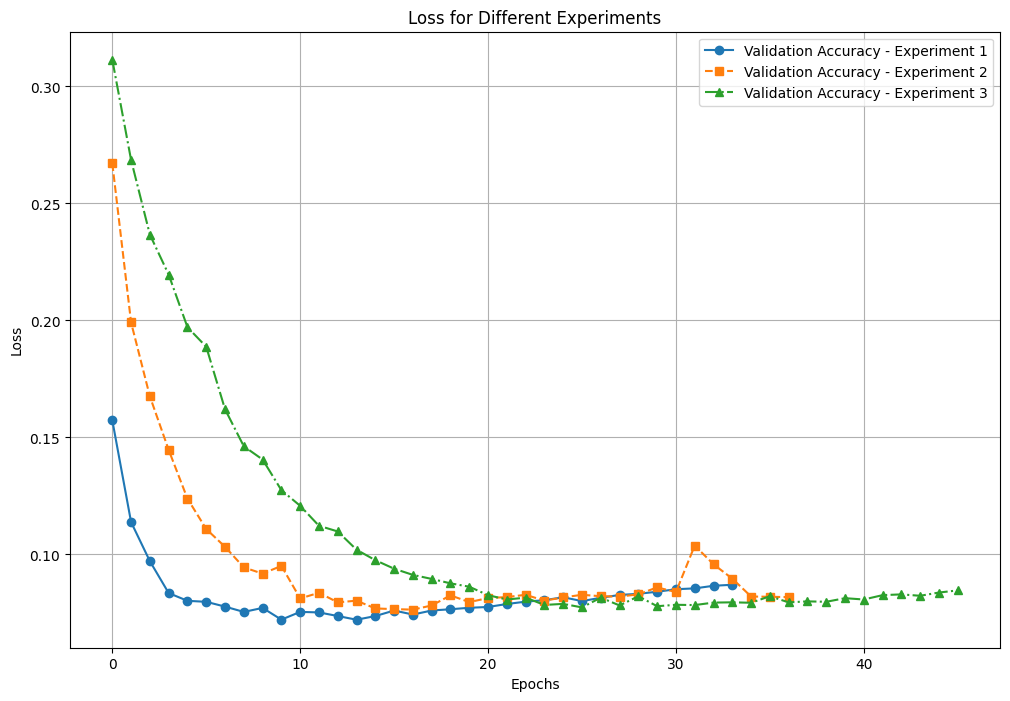

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\n最好LOSS: {best_loss}")

    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

不同參數實驗

In [17]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 256, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 3, 'hidden_units': 512, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 4, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}
]

histories = []
batch = [32, 128, 64, 256]
patient = [10, 10, 10, 10]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

Epoch 1/100


c:\Users\UM\anaconda3\envs\bug\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 - 5s - 3ms/step - accuracy: 0.9170 - f1_score: 0.9159 - loss: 0.2877 - precision_5: 0.9475 - recall_5: 0.8866 - val_accuracy: 0.9517 - val_f1_score: 0.9513 - val_loss: 0.1631 - val_precision_5: 0.9632 - val_recall_5: 0.9423
Epoch 2/100
1500/1500 - 4s - 3ms/step - accuracy: 0.9624 - f1_score: 0.9620 - loss: 0.1301 - precision_5: 0.9694 - recall_5: 0.9556 - val_accuracy: 0.9651 - val_f1_score: 0.9648 - val_loss: 0.1213 - val_precision_5: 0.9713 - val_recall_5: 0.9598
Epoch 3/100
1500/1500 - 4s - 3ms/step - accuracy: 0.9741 - f1_score: 0.9740 - loss: 0.0886 - precision_5: 0.9782 - recall_5: 0.9696 - val_accuracy: 0.9683 - val_f1_score: 0.9680 - val_loss: 0.1016 - val_precision_5: 0.9741 - val_recall_5: 0.9650
Epoch 4/100
1500/1500 - 4s - 3ms/step - accuracy: 0.9802 - f1_score: 0.9801 - loss: 0.0660 - precision_5: 0.9835 - recall_5: 0.9775 - val_accuracy: 0.9696 - val_f1_score: 0.9695 - val_loss: 0.1044 - val_precision_5: 0.9723 - val_recall_5: 0.9672
Epoch 5/100
1500/1500 - 4s -

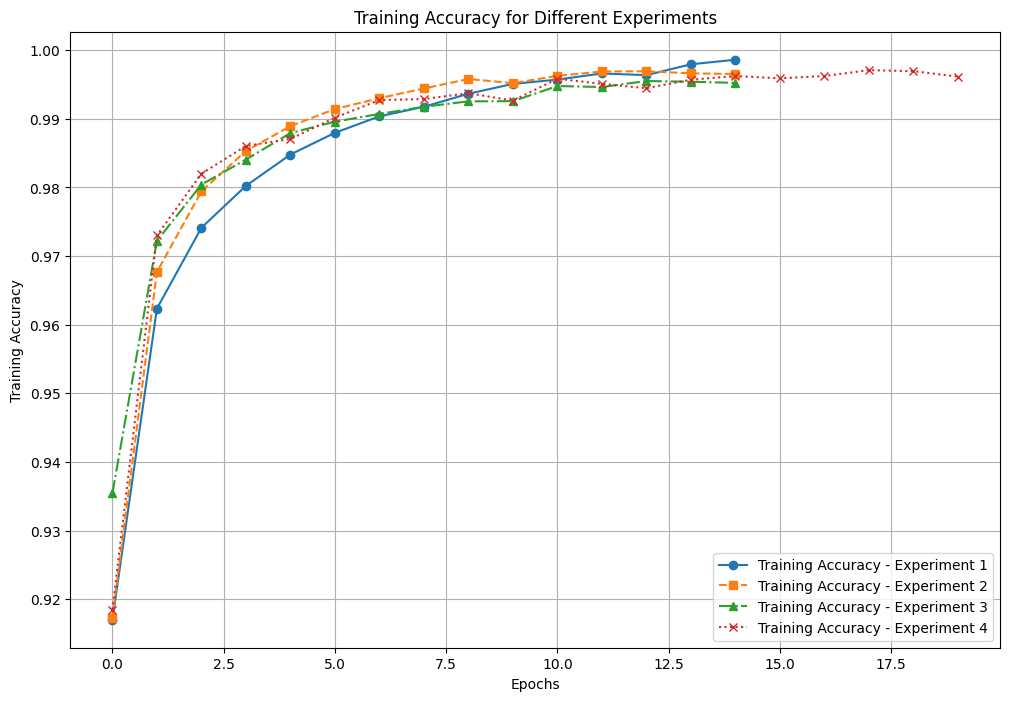

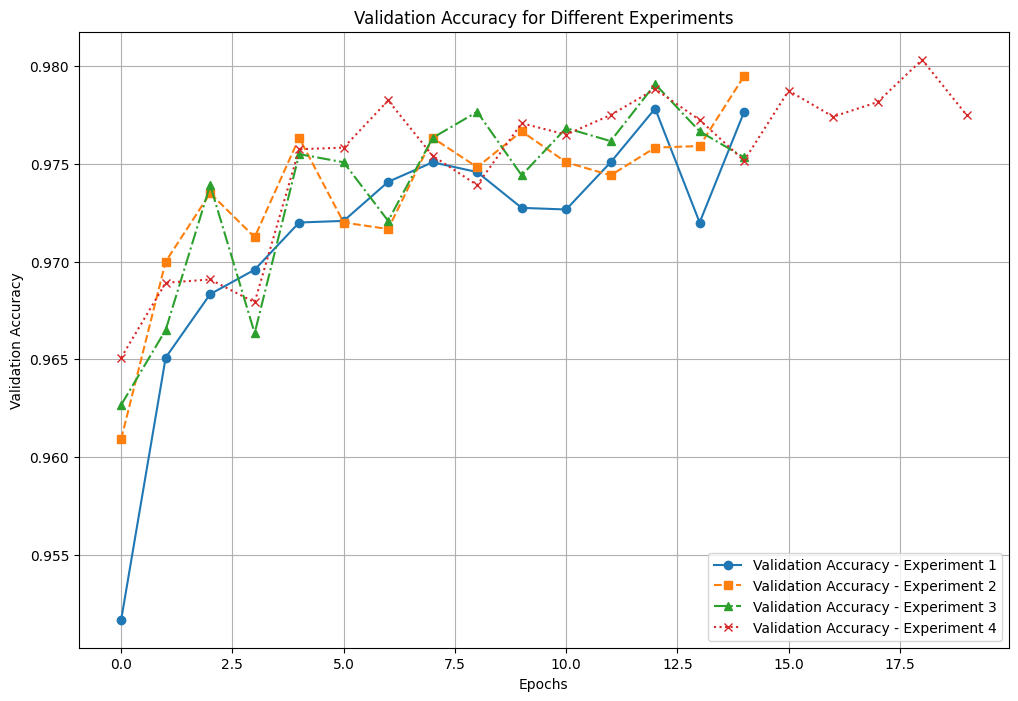

    參數組合  BEST VAL ACCURACY  BEST VAL LOSS
0  第1組參數           0.977833       0.099358
1  第2組參數           0.979500       0.103323
2  第3組參數           0.979083       0.122077
3  第4組參數           0.980333       0.096196


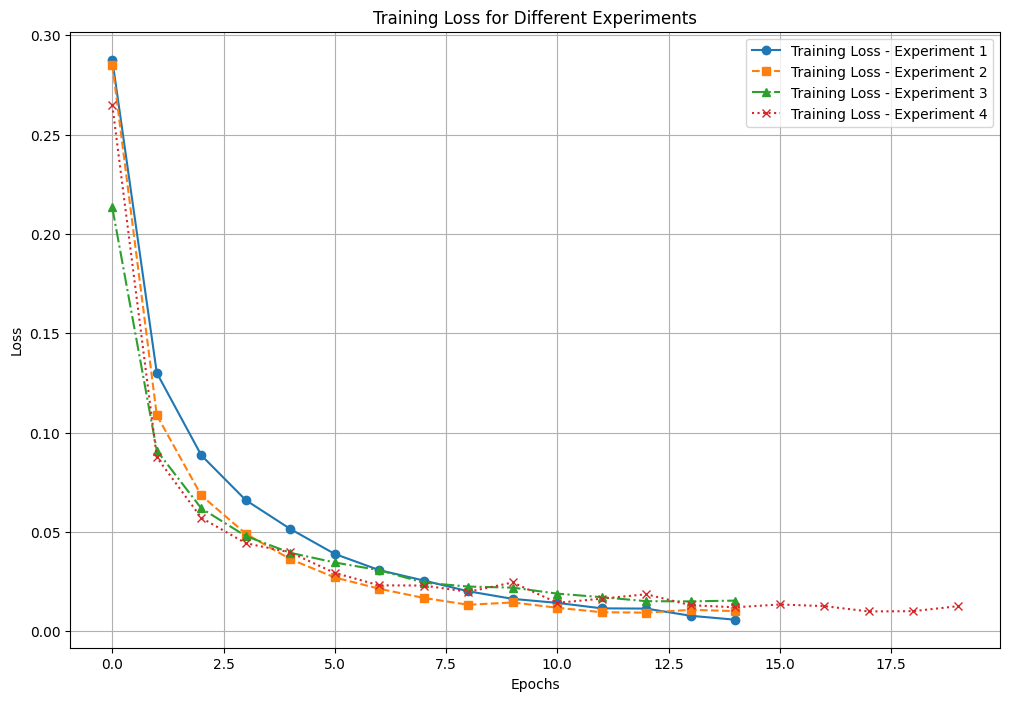

<Figure size 640x480 with 0 Axes>

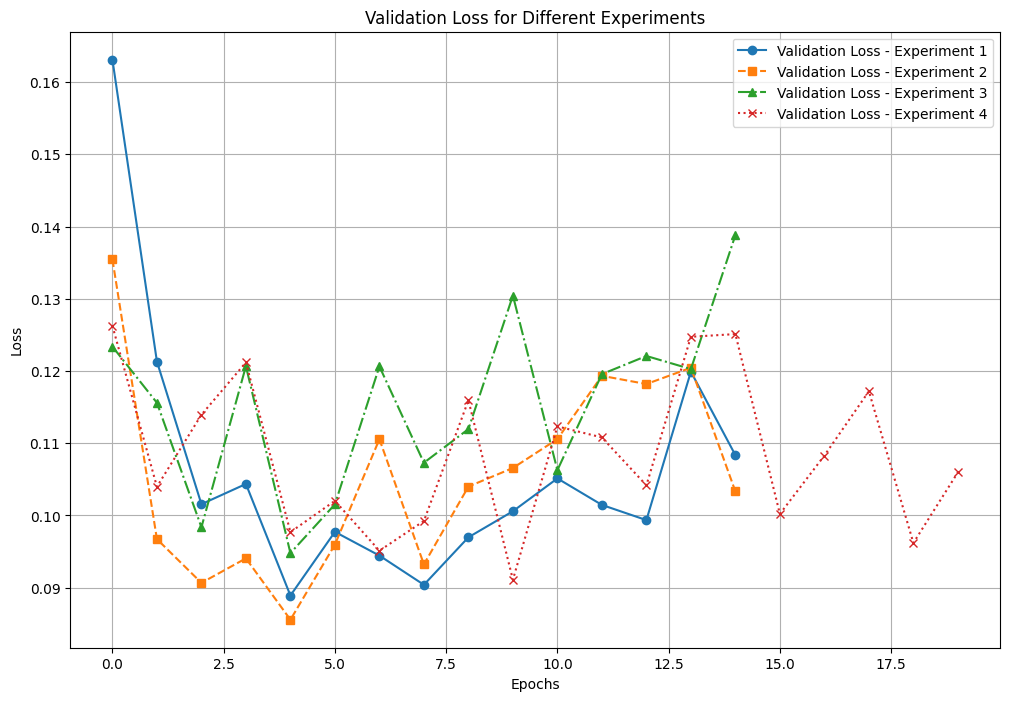

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12, 8))
results_acc = []
results_loss = []

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_accuracy = history_df['accuracy'].max()
    plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Accuracy - Experiment {i+1}')
plt.title('Training Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_accuracy = history_df['val_accuracy'].max()
    best_val_epoch = history_df['val_accuracy'].idxmax() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']
    results_acc.append({'參數組合': f'第{i+1}組參數', 'BEST VAL ACCURACY': best_val_accuracy, 'BEST VAL LOSS': best_val_loss})
    # print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好Accuracy: {best_val_accuracy}\nLOSS: {best_val_loss}")
    # plt.text(best_val_epoch, best_val_accuracy, f'Epoch {best_val_epoch}\nBest Val Acc: {best_val_accuracy:.4f}', 
    #             horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='green')
    # plt.plot(history_df['accuracy'], linestyle=linestyles[i], marker=markers[i], label=f'Training Accuracy - Experiment {i+1}')
    plt.plot(history_df['val_accuracy'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Accuracy - Experiment {i+1}')

plt.title('Validation Accuracy for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
results_df_acc = pd.DataFrame(results_acc)
print(results_df_acc)


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    plt.plot(history_df['loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Training Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
plt.title('Training Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_loss = history_df['val_loss'].min()
    best_loss_epoch = history_df['val_loss'].idxmin() + 1
    # print(f"第{i+1}組參數: 在第 {best_loss_epoch} EPOCH\nBEST LOSS: {best_loss}")
    results_loss.append({'參數組合': f'第{i+1}組參數', 'BEST LOSS': best_loss, 'BEST LOSS EPOCH': best_loss_epoch})
    plt.plot(history_df['val_loss'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation Loss - Experiment {i+1}')
    
    # plt.subplot(2, 2, i + 1)
    # # plt.plot(history.history['loss'], label='train_loss')
    # # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title(f'Experiment {i + 1} Loss')
    # plt.legend()
# results_df_loss = pd.DataFrame(results_loss)
# print(results_df_loss)
plt.title('Validation Loss for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()
